<a href="https://colab.research.google.com/github/mehdi-nait/Set-Game-app/blob/master/CNN_4A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Copie de la dataset github

In [1]:
cp -r drive/MyDrive/Set_Solver_data/Dataset5A/  otherData

cp: cannot stat 'drive/MyDrive/Set_Solver_data/Dataset5A/': No such file or directory


In [2]:
!git clone https://github.com/tomwhite/set-game.git

Cloning into 'set-game'...
remote: Enumerating objects: 15697, done.
remote: Total 15697 (delta 0), reused 0 (delta 0), pack-reused 15697
Receiving objects: 100% (15697/15697), 396.93 MiB | 28.61 MiB/s, done.
Resolving deltas: 100% (803/803), done.
Checking out files: 100% (13622/13622), done.


In [3]:
cp -r set-game/data/train-v2/labelled train

In [4]:
cp -r set-game/data/train-out test

In [5]:
rm -rf train/labelled/

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
import cv2
from google.colab.patches import cv2_imshow

# variables utiles

In [7]:
#nombre d'images passés en une seule fois au modèle
BATCH_SIZE = 32


#taille des images en entrée
IMG_SIZE = (160, 160)

train_dir = "train"
validation_dir = "validation"
test_dir = "test"

CLASS_NAMES = os.listdir(train_dir)


In [8]:

def blur(img):
    """returns a blurred version of the input image using a 5*5 kernel"""

    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = increase_brightness(img)
    return (cv2.blur(img,(5,5)))


def increase_brightness(img, value=30):
    """returns a brighter version of the input image"""
    
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)

    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value

    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img

In [9]:
#Création des générateurs de données à partir des chemins spécifiés
train_datagen = ImageDataGenerator(preprocessing_function=blur,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=180,
    horizontal_flip=True,
    validation_split=0.2)


#séparation en train et validation

train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size=BATCH_SIZE,
    shuffle=True,
    target_size=IMG_SIZE,
    classes =CLASS_NAMES,
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    shuffle=True,
    target_size=IMG_SIZE,
    classes =CLASS_NAMES,
    batch_size=BATCH_SIZE,
    subset='validation'
)

Found 10557 images belonging to 81 classes.
Found 2592 images belonging to 81 classes.


In [10]:
image_batch, label_batch = next(train_generator)
image_batch.shape

H,W = IMG_SIZE
INPUT_SHAPE=(H,W,3)
print(INPUT_SHAPE)

(160, 160, 3)


# Création du modèle

In [11]:
    dropout_rate =0.2
    
    model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=INPUT_SHAPE),
    tf.keras.layers.MaxPooling2D(2, 2), 
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(dropout_rate, name="dropout_out2"),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(dropout_rate, name="dropout_out3"),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(dropout_rate, name="dropout_out4"),
    # The fourth convolution
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(81, activation='softmax')
        # Your Code Here
    ])


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 158, 158, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 79, 79, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 77, 77, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 38, 38, 32)        0         
_________________________________________________________________
dropout_out2 (Dropout)       (None, 38, 38, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 36, 36, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0

In [13]:
model.compile(optimizer="adam",metrics=['accuracy'],loss="categorical_crossentropy")

In [14]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=val_generator.n//val_generator.batch_size

In [16]:
history = model.fit(train_generator,
                    steps_per_epoch = train_generator.samples // BATCH_SIZE,
                    validation_data=val_generator,
                    validation_steps = val_generator.samples // BATCH_SIZE,
                    epochs=12)

Epoch 1/12
329/329 [==============================] - 113s 345ms/step - loss: 1.2788 - accuracy: 0.5802 - val_loss: 0.6236 - val_accuracy: 0.7901
Epoch 2/12
329/329 [==============================] - 111s 336ms/step - loss: 0.6561 - accuracy: 0.7770 - val_loss: 0.3688 - val_accuracy: 0.8893
Epoch 3/12
329/329 [==============================] - 112s 339ms/step - loss: 0.3585 - accuracy: 0.8861 - val_loss: 0.6908 - val_accuracy: 0.8164
Epoch 4/12
329/329 [==============================] - 112s 342ms/step - loss: 0.3014 - accuracy: 0.9038 - val_loss: 0.1937 - val_accuracy: 0.9421
Epoch 5/12
329/329 [==============================] - 111s 338ms/step - loss: 0.1956 - accuracy: 0.9390 - val_loss: 0.1088 - val_accuracy: 0.9688
Epoch 7/12
329/329 [==============================] - 112s 340ms/step - loss: 0.2011 - accuracy: 0.9349 - val_loss: 0.1995 - val_accuracy: 0.9394
Epoch 8/12
329/329 [==============================] - 111s 339ms/step - loss: 0.2414 - accuracy: 0.9235 - val_loss: 0.2554 -

# Evaluation du modèle

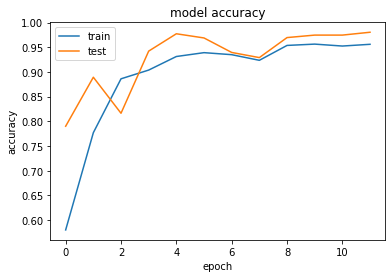

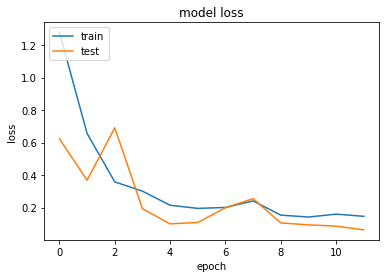

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# SAVE MODEL


In [18]:
model.save('CNN_V2_git_V2.h5')

In [19]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmptzr358kh/assets


In [20]:
with open('CNN_V2_git_v2_lite.tflite', 'wb') as f:
  f.write(tflite_model)

In [21]:
with open('CLASS_NAMES.txt', 'w') as file:
    for s in CLASS_NAMES:
      file.write("'"+s+"'"+",\n")

# Tests on real dataset (drive)

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from scipy import ndimage

In [ ]:
!rm *.zip

In [ ]:
!mv set-game/data/ad-hoc ad-hoc/
!mv set-game/data/webcam webcam/
!mv set-game/data/*.jpg webcam/
!mv ad-hoc/* webcam/
!rm webcam/*.txt


In [ ]:
cd Photos_one/

/content/Photos_one


In [ ]:
#renaming some pictures to match the naming convention of the training dataset

import os
files = os.listdir()
for f in files:
  name = f.split(".")
  os.rename(f,str(files.index(f))+"."+name[1].lower())
  print(str(files.index(f))+"."+name[1].lower())

In [ ]:
def crop_rect(img, rect):
    """returns a cropped rectangle from the given image"""

    # get the parameter of the small rectangle
    center = rect[0]
    size = rect[1]
    angle = rect[2]
    center, size = tuple(map(int, center)), tuple(map(int, size))

    # get row and col num in img
    rows, cols = img.shape[0], img.shape[1]

    M = cv2.getRotationMatrix2D(center, angle, 1)
    img_rot = cv2.warpAffine(img, M, (cols, rows))
    out = cv2.getRectSubPix(img_rot, size, center)

    return out, img_rot


def find_cards(image_path):
  """performs segmentation of all cards present on the image
     @params : image_path
     @returns: an array containing the segmented images"""
  #params
  index=-1
  thickness=3
  color=(255,0,0)
  seuil = 0.5
  cards = []
  box = []

  image = cv2.imread(image_path)
  image = cv2.resize(image,(750,750)) # resizing 
  #creating image copies that we will be drawn on
  
  contours_image = image.copy() #the copy that will contain the contours (bleu)
  box_image = image.copy()      #the copy that will contain the boxes 

  #finding contours
  image = cv2.GaussianBlur(image,(5,5),1) # gaussian blur to smoothen the image
  edge = cv2.Canny(image,25,25) # detect edges from colored image
  contours, hierarchy = cv2.findContours(edge,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE) #find contours

  #sorting contours by surface
  contours = sorted(contours, key=cv2.contourArea,reverse=True)[:]

  #selecting a threshold and filtering noise
  max = cv2.contourArea(contours[0])
  thresh = max*seuil
  contours = [c for c in contours if cv2.contourArea(c)>thresh]
 
  #from contours to bounding boxes

  rect = [cv2.minAreaRect(i) for i in contours] #getting rectangle
  


  # the following bloc is used for visualization purposes

  #rect = cv2.minAreaRect(_ctr)
  #box = cv2.boxPoints(rect)
  #box = np.int0(box)
  #cv2.drawContours(image,[box],0,(0,0,255),2)

  

  for re in rect:
    cropped,_ = crop_rect(image, re)
    cards.append(cropped)
    
  return cards,rect

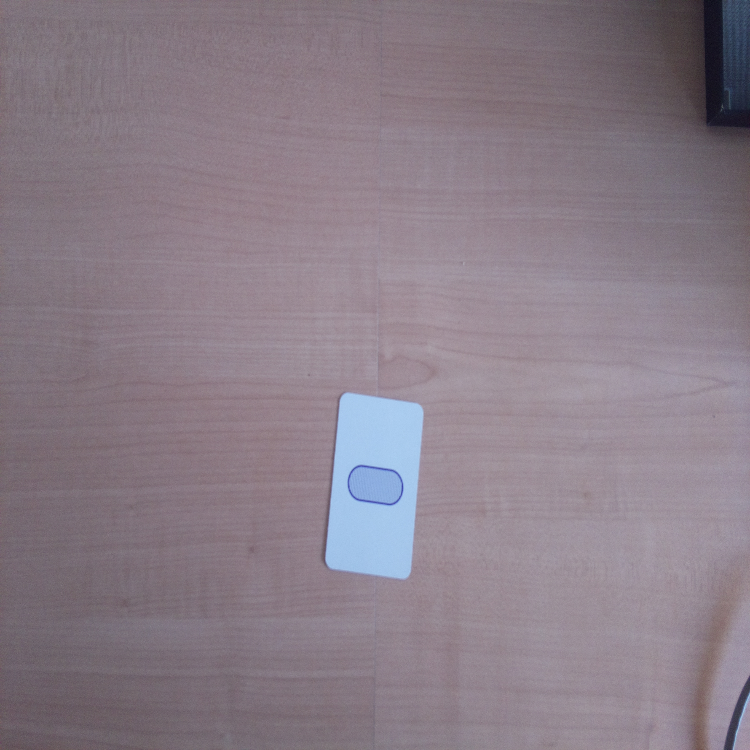

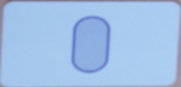

In [ ]:
path = "/content/Photos_one/1.jpg"

image = cv2.imread(path)
image = cv2.resize(image,(750,750))
cv2_imshow(image)
cards, rect = find_cards(path)
for c in cards:
  cv2_imshow(c)

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from scipy import ndimage


def trim(frame):
    """removes black edges of the image, source: https://stackoverflow.com/questions/13538748/crop-black-edges-with-opencv"""
    #crop top
    if not np.sum(frame[0]):
        return trim(frame[1:])
    #crop bottom
    elif not np.sum(frame[-1]):
        return trim(frame[:-2])
    #crop left
    elif not np.sum(frame[:,0]):
        return trim(frame[:,1:]) 
    #crop right
    elif not np.sum(frame[:,-1]):
        return trim(frame[:,:-2])    
    return frame

def plot_find_ROI(image_path):
    """finds and trims the cards and prints the steps (for debugging uses)"""
    
    image = cv2.imread(image_path)
    image = cv2.resize(image,(250,250)) # resizing 
    #cv2_imshow(image)
    image = cv2.GaussianBlur(image,(5,5),1) # gaussian blur to smoothen the image
    edge = cv2.Canny(image,100,200) # detect edges from colored image

    contours, hierarchy = cv2.findContours(edge,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE) #find contours

    img_cpy = image.copy() #create an image copy
    
    index=0
    thickness=3
    color=(255,0,0)
    
    cv2.drawContours(img_cpy,contours,index,color,thickness)  #select first contour
    cv2_imshow(edge) #show edged image
    cv2_imshow(img_cpy) #show image + contours

    ############################### min surf rect
    img_cpy3 = image.copy()
    rect = cv2.minAreaRect(contours[0]) #create a rectangle from contour

    box = cv2.boxPoints(rect) #convert into a four points array[[x y]]
    box = np.int0(box) #cast into integers

    angle = rect[2]
    print("theta= ",angle)
    im = cv2.drawContours(img_cpy3,[box],0,(0,0,255),2) #draw rectangular contour
    cv2_imshow(im)

    rotated = ndimage.rotate(img_cpy3, angle)
    cv2_imshow(rotated)

    pts = box

    mask = np.zeros(image.shape, np.uint8)
    cv2.drawContours(mask, [pts], -1, (255, 255, 255), -1, cv2.LINE_AA)
    result = cv2.bitwise_and(image, mask)
    rotated = ndimage.rotate(result, angle)

    cv2_imshow(rotated)

    
    thold = (rotated>120)*rotated
    trimmedImage = trim(rotated)
    trimmedImage = cv2.resize(trimmedImage,(250,250))
    cv2_imshow(thold)
    cv2_imshow(trimmedImage)
    
def find_ROI(image_path):
    """Without plotting the steps, finds the contours and crops the image"""

    image = cv2.imread(image_path)
    image = cv2.resize(image,(250,250)) # resizing 
    #cv2_imshow(image)
    image = cv2.GaussianBlur(image,(5,5),1) # gaussian blur to smoothen the image
    edge = cv2.Canny(image,100,200) # detect edges from colored image

    contours, hierarchy = cv2.findContours(edge,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE) #find contours

    img_cpy = image.copy() #create an image copy
    
    index=0
    thickness=3
    color=(255,0,0)
    
    cv2.drawContours(img_cpy,contours,index,color,thickness)  #select first contour
    #cv2_imshow(edge) #show edged image
    #cv2_imshow(img_cpy) #show image + contours

    ############################### min surf rect
    img_cpy3 = image.copy()
    rect = cv2.minAreaRect(contours[0]) #create a rectangle from contour

    box = cv2.boxPoints(rect) #convert into a four points array[[x y]]
    box = np.int0(box) #cast into integers

    angle = rect[2]
    #print("theta= ",angle)
    im = cv2.drawContours(img_cpy3,[box],0,(0,0,255),2) #draw rectangular contour
    #cv2_imshow(im)

    rotated = ndimage.rotate(img_cpy3, angle)
    #cv2_imshow(rotated)

    pts = box

    mask = np.zeros(image.shape, np.uint8)
    cv2.drawContours(mask, [pts], -1, (255, 255, 255), -1, cv2.LINE_AA)
    result = cv2.bitwise_and(image, mask)
    rotated = ndimage.rotate(result, angle)

    #cv2_imshow(rotated)

    
    thold = (rotated>120)*rotated
    trimmedImage = trim(rotated)
    trimmedImage = cv2.resize(trimmedImage,(160,160))
    
    #cv2_imshow(thold)
    #cv2_imshow(trimmedImage)
    return trimmedImage
        

In [ ]:
image = find_ROI(path)
cv2_imshow(image)
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)
      
#prediction

image=np.expand_dims(image,axis = 0)
v= model.predict(image)
index = np.argmax(v)
label = CLASS_NAMES[index]
plt.title(label,fontsize=10)

In [ ]:

def crop_random(directory,rows,columns):
  """ Prend un échantillon aléatoire de taille .. des images de directory et affiche les images segmentés
      arguments : directory = str :chemin des images"""

  #Preparing image paths
  image_names = os.listdir(directory)
  image_names = [directory+"/"+ x for x in image_names]
  
  #print(image_names)
  count = len(image_names)
  

  
  
  if (rows*columns<count):
    plt.figure(figsize=(20, 20))
    for i in range(1,rows*columns+1):

      ax =plt.subplot(rows,columns,i)
      
      #Randomly select from image_names
      rand = np.random.choice(image_names,1)
      
      image = find_ROI(rand[0])
      #image = ndimage.rotate(image,20)
      image = cv2.resize(image,(160,160))
      
      plt.imshow(image)
      plt.title(i)
      print("image {} : {}".format(i,rand[0]))
      

In [ ]:
classes = os.listdir("otherData")
print(classes)

['twoMediumGreenDiamond']


In [ ]:
predict_random("otherData/oneEmptyGreenDiamond",5,5)

In [ ]:
cl = np.random.choice(classes,1)[0]
crop_random("otherData/oneEmptyGreenDiamond",5,5)

In [ ]:
labels= os.listdir("train")


Found 13149 images belonging to 81 classes.


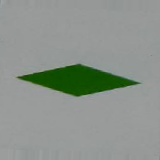

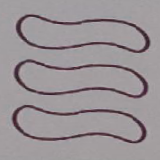

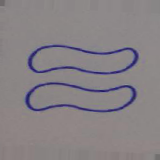

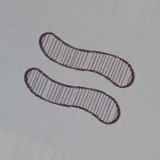

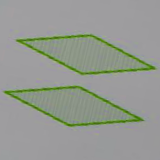

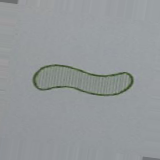

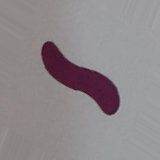

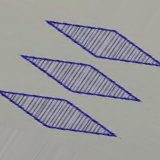

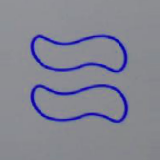

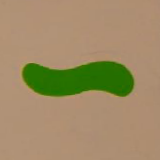

In [ ]:
path = "train"
path = ["train/"+x for x in os.listdir("train")]
#selecting one path
path = path[0]
images = [path+"/"+x for x in os.listdir(path)]

gen = ImageDataGenerator(
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=30,
    horizontal_flip=True,)
testing_batches = gen.flow_from_directory(directory="train",target_size=(160,160),classes=labels,batch_size=10,shuffle=True)

images,lab = testing_batches.next()
for i in range(0,10):
  cv2_imshow(images[i])